# Covid-19 Recovery Time Predictive Model

## Introduction

The Covid-19 pandemic has had a profound impact on the world. While numerous studies have examined symptoms, mortality risks, and vaccine development, relatively few have focused on predicting patients' recovery time. This analysis aims to address that gap.

## Methodology

This study seeks to predict the recovery time for Covid-19 patients using a supervised Machine Learning model. Specifically, a Linear Regression model was implemented, chosen based on the nature of the data and its suitability for this task. The model was trained on a dataset containing 18,000 cases of Covid-19 infections in Colombia, all of which resulted in recovery.

## Model

The model attempts to predict the Recovery Time in days, given the next input variables:

* Age (in years)
* Sex
  * Sex_F (1: female; 0: other)
  * Sex_M (1: male; 0: other)
* Type of Contagion
  * C_Community (1: community infection; 0: other)
  * C_Imported (1: imported case; 0: other)
  * C_Related (1: related case; 0: other)
* Case treatment location
  * U_Home (1: treated at home; 0: other)
  * U_Hospital (1: treated at hospital - not ICU; 0: other)
  * U_Hospital_ICU (1: treated at hospital with ICU; 0: other)
* Case severity
  * E_Severe (1: severe; 0: other)
  * E_Slight (1: slight; 0: other)
  * E_Moderate (1: moderate; 0: other)
* Ethnicity
  * P_Indigenous (1: ethnicity indigenous; 0: other)
  * P_Black (1: ethnicity black; 0: other)
  * P_Other (1: ethnicity other; 0: other)
  * P_ROM (1: ethnicity ROM; 0: other)

### Hypotheses (Recovery Time vs Case Treatment Location)

* $H_0$: The type of care received (at home, hospital, or ICU) does not significantly affect recovery time.
<center>
$H_0 = \beta_{U\_Casa} = \beta_{U\_Hospital} = \beta_{U\_Hospital\_UCI}$
</center>

* $H_1$: The type of care received significantly affects recovery time.
<center>
$H_1 = \beta_{U\_Casa} \neq 0 \ \ \lor \ \ \beta_{U\_Hospital} \neq 0 \ \ \lor \ \ \beta_{U\_Hospital\_UCI} \neq 0$
</center>

## Results

### Outliers

* 91.55% of recovered cases occurred within 42 days, with a few extreme outliers extending recovery time to nearly 400 days. These extreme cases are dropped, as they may indicate errors in data collection or reporting.

### Statistical analysis

* 10 days is the most common recovery time, occurring in 43.6% of cases. This could reflect a large portion of patients recovering quickly, though it might also indicate potential bias or inconsistencies in the dataset measures.

* The mean recovery time was 15.2 days, with a standard deviation of 7.27 days, resulting in a coefficient of variation of 47.8%. This indicates significant variability in the data.

* The dataset is not very representative, as it primarily reflects recovery times for individuals who are treated at home (99.2%), caught the infection in the community (86.62%), have a mild condition (99.92%), and are classified as P_Otro in ethnicity (98.18%).
  * C_Comunitaria = 86.62%, C_Relacionado = 13.35%, C_Importado = 0.03%
  * U_Casa = 99.92%, U_Hospital = 0.06%, U_Hospital_UCI = 0.02%
  * E_Leve = 99.92% E_Moderado = 0.06% E_Grave = 0.02%
  * P_Otro = 98.18%, P_Indígena = 0.99%, P_Negro = 0.82%, P_ROM	0.00%

### Graphical analysis

* Recovery time was notably longer and more variable in patients over the age of 90.

### Model results

* Linear Regression equation:
<!-- $recovery\_time = 13.216 + (0.005) Edad + (-0.216) S\_F + (0.216) S\_M + (2.271) C\_Comunitaria + (-3.079) C\_Importado + (0.808) C\_Relacionado + (1.408) U\_Casa + (0.210) U\_Hospital + (-1.619) U\_Hospital\_UCI + (-1.619) E\_Grave + (1.408) E\_Leve + (0.210) E\_Moderado + (-0.587) P\_Indígena + (2.221) P\_Negro + (-3.082) P\_Otro + (1.448) P\_ROM$ -->
\begin{align*}
\text{recovery_time} \ = \\
& 0.005 \cdot \text{Edad} \\
& - 0.216 \cdot \text{S_F} \\
& + 0.216 \cdot \text{S_M} \\
& + 2.271 \cdot \text{C_Comunitaria} \\
& - 3.079 \cdot \text{C_Importado} \\
& + 0.808 \cdot \text{C_Relacionado} \\
& + 1.408 \cdot \text{U_Casa} \\
& + 0.210 \cdot \text{U_Hospital} \\
& - 1.619 \cdot \text{U_Hospital_UCI} \\
& + 1.619 \cdot \text{E_Grave} \\
& + 1.408 \cdot \text{E_Leve} \\
& + 0.210 \cdot \text{E_Moderado} \\
& - 0.587 \cdot \text{P_Indígena} \\
& + 2.221 \cdot \text{P_Negro} \\
& - 3.082 \cdot \text{P_Otro} \\
& + 1.448 \cdot \text{P_ROM}
\end{align*}

* The model's predictions are much less scattered than the actual values, with a coefficient of variation of 5.1% around a mean recovery time of 15.27 days. This low dispersion indicates that the predictions are tightly clustered, in contrast to the 47.8% variability in the original recovery times.

### Model performance

* The model's R² (Coefficient of Determination) was 1.2%, meaning it explained only a small fraction of the variance in recovery time, indicating limited predictive power.
* The Root Mean Squared Error (RMSE) was 7.3 days, meaning the model's predictions were, on average, off by about 7.3 days.
* The Mean Absolute Error (MAE) was 5.5 days, reflecting an average absolute error of 5.5 days. Unlike RMSE, this metric does not penalize larger errors more than smaller ones.
* The Mean Absolute Percentage Error (MAPE) was 37.2%, meaning the model's predictions, on average, deviated by 37.2%.
* Overall, the model is not accurate enough when predicting recovery time. However, a mean absolute error of 5.5 days (37.2% respect to the average recovery time) is a good starting point for further analysis with more representative datasets.

## Conclusion

* The coefficients in the Linear Regression equation suggest +1.408 recovery days for home recovery (U_Casa), +0.210 for hospital recovery (U_Hospital) and -1.619 for recovery with ICU (U_Hospital_UCI).

* However, the vast majority of the data (99.92%) belongs to home recoveries (U_Casa). Hence, those coefficients cannot lead to meaningful conclusions.

* Considering proportions, the average recovery time due to Case Treatment Location is $(1.408) 0.9992 + (0.210) 0.0006 + (-1.619) 0.0002 = 1.407$ days. Thus, the predicted recovery time due to Case Treatment Location respect to that average (1.407 days) is:
  * Home (U_Casa) = +0.001 recovery days (no difference, since most cases fall in this category).
  * Hospital (U_Hospital, no ICU) = -1.197 recovery days.
  * With ICU (U_Hospital_UCI) = -3.026 recovery days.

* The above reasoning suggests that **people treated with ICU recover, in average, 3 days faster than average**, whereas **people treated in hospitals (without ICU) recover, in average, 1.2 days faster than average**. People treated at home have the average recovery time, as they represent a 99.92% of the cases.

* Despite that result, we conclude that the proposed hypotheses $H_0$ and $H_1$ cannot be validated, as the dataset is not representative enough for various Case Treatment Locations.

## Further research

For more detailed insights, see the full [research study](https://www.researchgate.net/publication/380818622_Implementacion_de_Modelo_de_Machine_Learning_para_Estimacion_de_Tiempo_de_Recuperacion_de_Covid-19) (spanish), which accompanies this analysis.

# 1. Dataset

Source: [Casos positivos de COVID-19 en Colombia](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data) (6,092,403 rows, 23 columns)

Date of collection: April, 2022

The dataset has been reduced to the recovered cases, from the most recent 100,000, resulting in **95,440 records** found in the file dataset.csv (16.8 MB)

In [63]:
from google.colab import drive

import csv
import pandas as pd

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression

## 1.1. Data Collection and Cleaning

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset access path here
DATA_SOURCE = '/content/drive/MyDrive/Colab Notebooks/covid-19-time-recovery-model/dataset.csv';

In [4]:
# UTILS

def n_decimals(value, n=2):
  return f'{value:.{n}f}'

In [5]:
# READING DATA WITH COLUMN SELECTION AND DELETION OF N/A VALUES

def read_data(data_source):
  return pd.read_csv(data_source, usecols=[4, 6, 7, 8, 9, 10, 11, 12, 16, 10, 19, 20, 21]);

df = read_data(DATA_SOURCE)
df.dropna(inplace=True);

In [6]:
# AGE COLUMN ADJUSTMENT FOR INFECTIONS WITH AN AGE LESS THAN ONE YEAR

# If the value in Age Unit Measure is 2 (months) or 3 (days), the value in Age is converted to 0.
def age_zero(row):
  return 0 if row['Unidad de medida de edad'] in [2, 3] else row['Edad'];

df['Edad'] = df.apply(lambda row: age_zero(row), axis=1)

df.drop(columns=['Unidad de medida de edad'], inplace=True); # Column Age Unit Measure is dropped

In [7]:
# ELIMINATION OF CASES WHOSE TYPE OF CONTAGION IS UNDER STUDY AND MAPPING OF VALUES IN COLUMNS

# Filtering by Type of Contagion
df = df[df['Tipo de contagio'] != 'En estudio'];

# Column mapping
df['Pertenencia étnica'] = df['Pertenencia étnica'].map({1: 'Indígena', 2: 'ROM', 3: 'Raizal', 4: 'Palenquero', 5: 'Negro', 6: 'Otro'});
df['Sexo'] = df['Sexo'].map({'M': 'M', 'F': 'F', 'f': 'F'});
df['Ubicación del caso'] = df['Ubicación del caso'].map({'Casa': 'Casa', 'casa': 'Casa', 'Hospital': 'Hospital', 'Hospital UCI': 'Hospital_UCI'});
df['Estado'] = df['Estado'].map({'Leve': 'Leve', 'Moderado': 'Moderado', 'Grave': 'Grave', 'leve': 'Leve'});

<ipython-input-7-1866411103c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pertenencia étnica'] = df['Pertenencia étnica'].map({1: 'Indígena', 2: 'ROM', 3: 'Raizal', 4: 'Palenquero', 5: 'Negro', 6: 'Otro'});
<ipython-input-7-1866411103c5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sexo'] = df['Sexo'].map({'M': 'M', 'F': 'F', 'f': 'F'});
<ipython-input-7-1866411103c5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [8]:
# CALCULATION OF RECOVERY TIME AND ELIMINATION OF SYMPTOM ONSET AND RECOVERY DATES

format = '%Y-%m-%d %H:%M:%S';

def get_recovery_days(row):
  ini = datetime.strptime(row['Fecha de inicio de síntomas'], format);
  fin = datetime.strptime(row['Fecha de recuperación'], format);
  return (fin - ini).days;

df['Días de recuperación'] = df.apply(lambda row: get_recovery_days(row), axis=1)
df.drop(columns=['Fecha de inicio de síntomas', 'Fecha de recuperación'], inplace=True);

In [9]:
# RECOVERY TIME FREQUENCY GRAPH

sns.set_palette('tab10')

vc = df['Días de recuperación'].value_counts()

[Text(0.5, 0, 'Recovery time (days)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency graph of Recovery Times')]

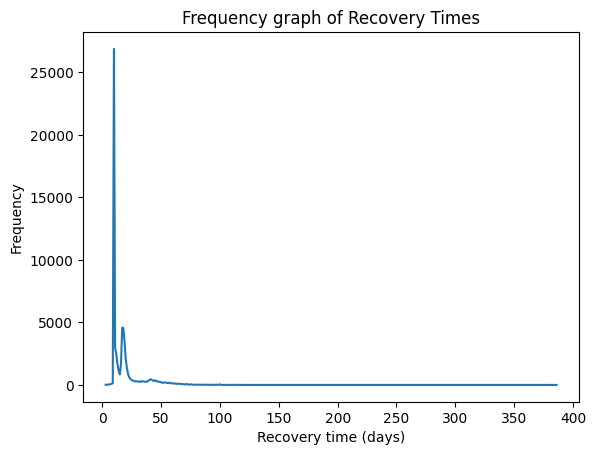

In [10]:
sns.lineplot(x=vc.index, y=vc.values) \
  .set(xlabel='Recovery time (days)', ylabel='Frequency', title='Frequency graph of Recovery Times')

## 1.2. Removing Outliers

The graph above shows the frequency (y-axis) of each value in the variable Recovery days (x-axis). It can be observed that most of the data corresponds to recovery times of less than 50 days. Higher frequencies are considered outliers.

In [11]:
# FREQUENCY OF RECOVERY TIMES LESS THAN OR EQUAL TO 42 DAYS

vc42 = vc[[i <= 42 for i in vc.index]]

In [12]:
print(f'Cases with less than or equal to 42 Recovery Days: {n_decimals(100 * sum(vc42.values) / sum(vc.values), 2)}%')

Cases with less than or equal to 42 Recovery Days: 91.55%


[Text(0.5, 0, 'Recovery time (days)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency graph of Recovery Times <= 42')]

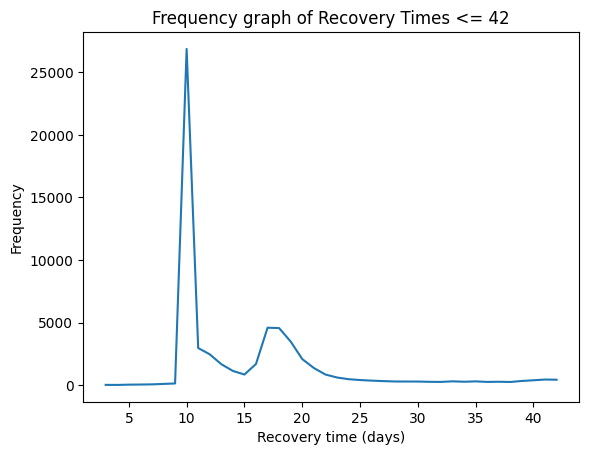

In [13]:
sns.lineplot(x=vc42.index, y=vc42.values) \
  .set(xlabel='Recovery time (days)', ylabel='Frequency', title='Frequency graph of Recovery Times <= 42')

Based on the maximum recovery time of six weeks (42 days) suggested in [the referenced study](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0252389), we will analyze only cases with recovery duration of 42 days or less, which represents a 91% of the data.

In [14]:
# DELETION OF CASES WITH RECOVERY DAYS GREATER THAN 42

df = df[df['Días de recuperación'] <= 42];

## 1.3. Final Dataset

In [15]:
df

,Nombre departamento,Nombre municipio,Edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Tipo de recuperación,Pertenencia étnica,Días de recuperación
0,CUNDINAMARCA,SOACHA,15,M,Comunitaria,Casa,Leve,Tiempo,Otro,24
1,RISARALDA,PEREIRA,67,M,Comunitaria,Casa,Leve,Tiempo,Otro,24
2,BOYACA,TUNJA,32,F,Relacionado,Casa,Leve,Tiempo,Otro,24
3,CALDAS,MANIZALES,11,F,Comunitaria,Casa,Leve,Tiempo,Otro,24
4,CALDAS,MANIZALES,28,F,Comunitaria,Casa,Leve,Tiempo,Otro,24
...,...,...,...,...,...,...,...,...,...,...
95435,BARRANQUILLA,BARRANQUILLA,75,M,Comunitaria,Casa,Leve,Tiempo,Otro,11
95436,BARRANQUILLA,BARRANQUILLA,8,M,Comunitaria,Casa,Leve,Tiempo,Otro,11
95437,BARRANQUILLA,BARRANQUILLA,0,M,Comunitaria,Casa,Leve,Tiempo,Otro,11
95438,BARRANQUILLA,BARRANQUILLA,38,M,Comunitaria,Casa,Leve,Tiempo,Otro,11


[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency graph of Ages')]

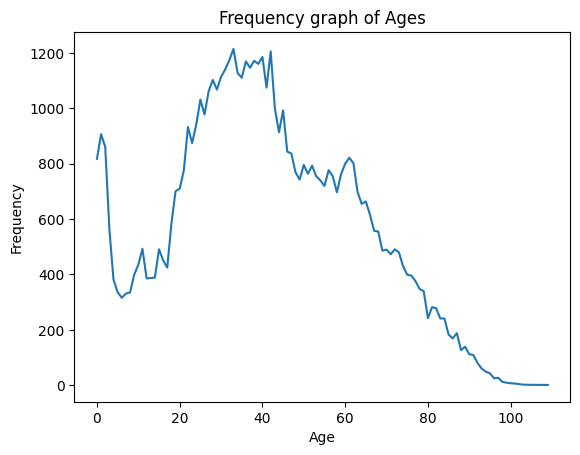

In [16]:
vc_age = df['Edad'].value_counts()
sns.lineplot(x=vc_age.index, y=vc_age.values) \
  .set(xlabel='Age', ylabel='Frequency', title='Frequency graph of Ages')

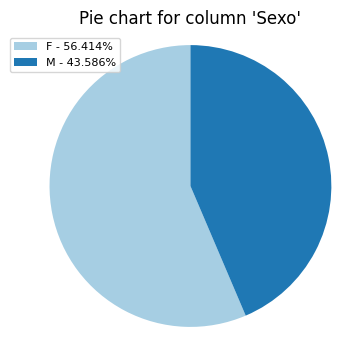

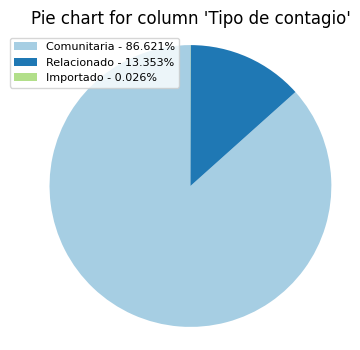

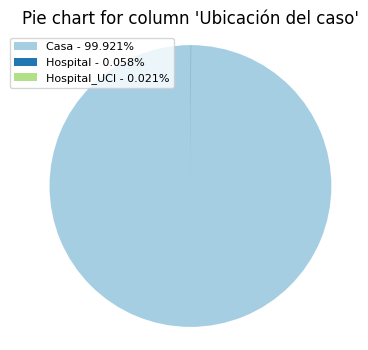

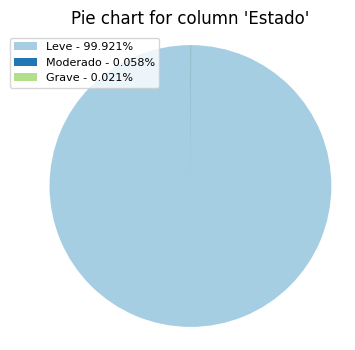

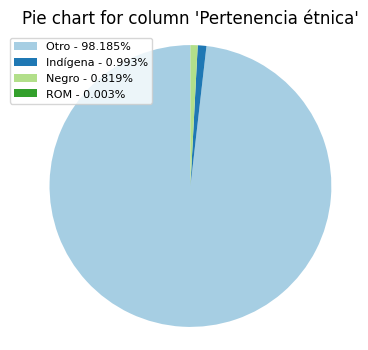

In [17]:
categ_cols = ['Sexo', 'Tipo de contagio', 'Ubicación del caso', 'Estado', 'Pertenencia étnica']

for column in categ_cols:
  value_counts = df[column].value_counts(normalize=True) * 100
  unique_values = value_counts.index
  plt.figure(figsize=(4, 4))
  patches, _ = plt.pie(value_counts, startangle=90, colors=plt.cm.Paired.colors)
  plt.title(f"Pie chart for column '{column}'")
  plt.axis('equal')
  labels = ['{0} - {1:1.3f}%'.format(i, j) for i, j in zip(unique_values, value_counts)]
  plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.1, 1.), fontsize=8)
  plt.show()
  # for value, count in dict(zip(unique_values, value_counts)).items():
  #   print(f'{value}\t{n_decimals(count)}%')
  print()

# 2. Statistical Analysis

In [18]:
print('Recovery time (days)')
print()
print('MEASURES OF CENTRAL TENDENCY')
print('Mean:', df['Días de recuperación'].mean())
print('Mean in women:', df[df['Sexo'] == 'F']['Días de recuperación'].mean())
print('Mean in men:', df[df['Sexo'] == 'M']['Días de recuperación'].mean())
mode = df['Días de recuperación'].mode()[0]
print('Mode:', mode, f"({n_decimals(100 * df[df['Días de recuperación'] == mode]['Días de recuperación'].count() / df['Días de recuperación'].count(), 1)}%)")
print('Median:', df['Días de recuperación'].median())
print()
print('MEASURES OF DISPERSION')
print('Standard deviation:', df['Días de recuperación'].std())
print('Standard deviation in women:', df[df['Sexo'] == 'F']['Días de recuperación'].std())
print('Standard deviation in men:', df[df['Sexo'] == 'M']['Días de recuperación'].std())
print('Range:', df['Días de recuperación'].max() - df['Días de recuperación'].min())
print()
print('Coefficient of variation', df['Días de recuperación'].std() / df['Días de recuperación'].mean())

Recovery time (days)

MEASURES OF CENTRAL TENDENCY
Mean: 15.274710834969095
Mean in women: 15.084859813084112
Mean in men: 15.520433229120142
Mode: 10 (43.6%)
Median: 12.0

MEASURES OF DISPERSION
Standard deviation: 7.275145691224078
Standard deviation in women: 7.126317125650358
Standard deviation in men: 7.456327562230082
Range: 39

Coefficient of variation 0.4762869667273016


# 3. Graphic Analysis

## 3.1. Recovery Time vs Age

### 3.1.1. Scatter Chart

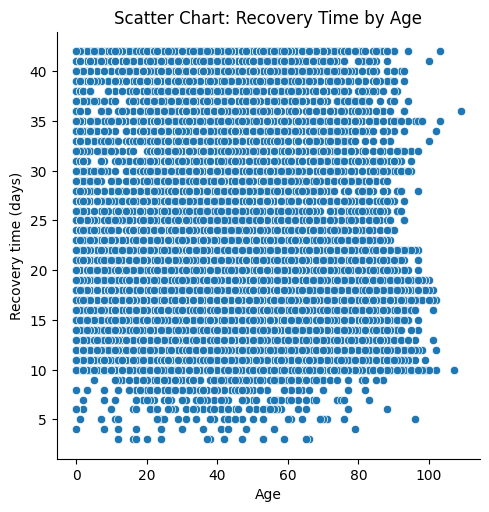

In [19]:
sns.relplot(data=df, x='Edad', y='Días de recuperación') \
  .set(xlabel='Age', ylabel='Recovery time (days)', title='Scatter Chart: Recovery Time by Age');

### 3.1.2. Line Chart

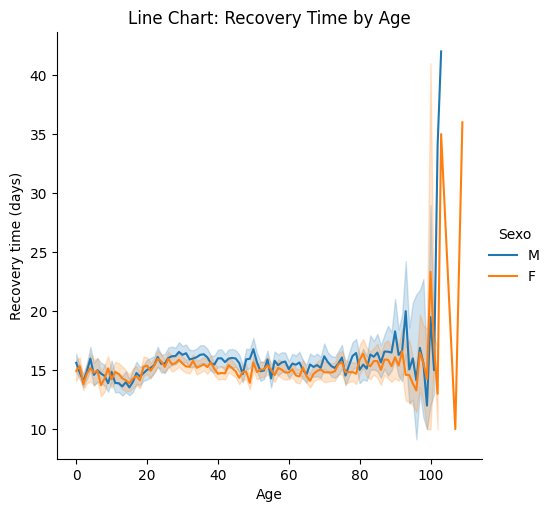

In [20]:
sns.relplot(data=df, x='Edad', y='Días de recuperación', kind='line', hue='Sexo') \
  .set(xlabel='Age', ylabel='Recovery time (days)', title='Line Chart: Recovery Time by Age');

## 3.2. Recovery Time by Sex

### 3.2.1. Scatter Chart

<ipython-input-21-28698085f01e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='Sexo', y='Días de recuperación', palette='pastel') \


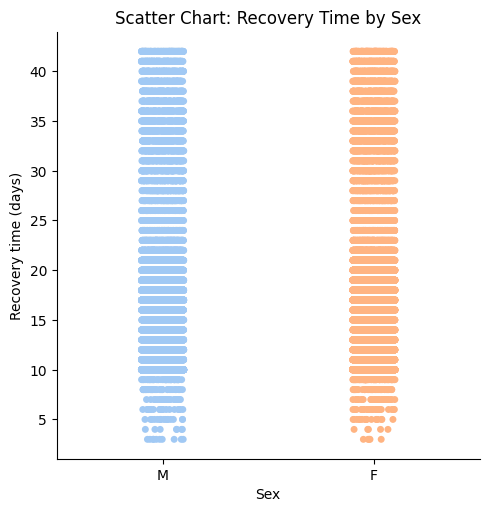

In [21]:
sns.catplot(data=df, x='Sexo', y='Días de recuperación', palette='pastel') \
  .set(xlabel='Sex', ylabel='Recovery time (days)', title='Scatter Chart: Recovery Time by Sex')

### 3.2.2. Bar Chart

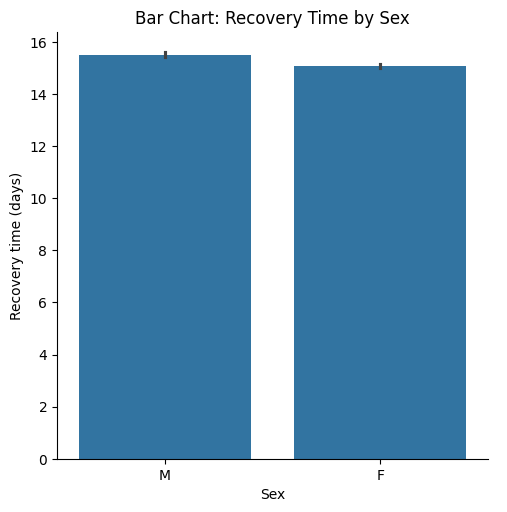

In [22]:
sns.catplot(data=df, x='Sexo', y='Días de recuperación', kind='bar') \
  .set(xlabel='Sex', ylabel='Recovery time (days)', title='Bar Chart: Recovery Time by Sex');

### 3.2.3. Box Plot

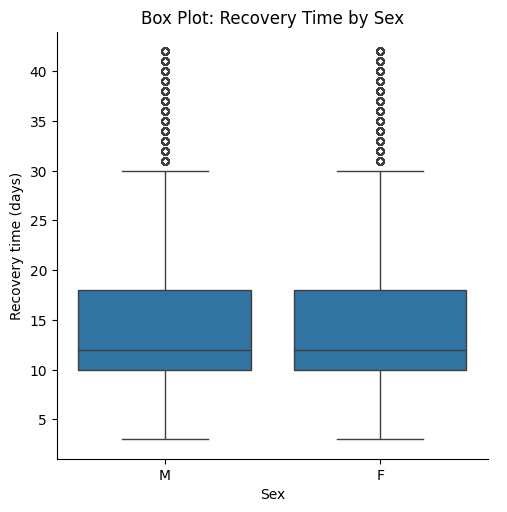

In [23]:
sns.catplot(x='Sexo', y='Días de recuperación', data=df, kind='box') \
  .set(xlabel='Sex', ylabel='Recovery time (days)', title='Box Plot: Recovery Time by Sex');

### 3.2.4. Boxen Plot

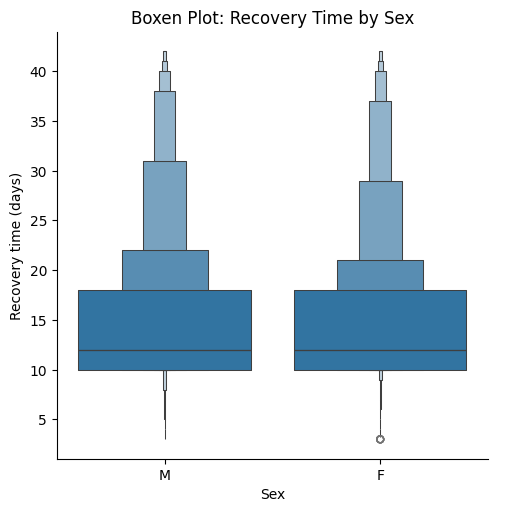

In [24]:
sns.catplot(x='Sexo', y='Días de recuperación', data=df, kind='boxen') \
  .set(xlabel='Sex', ylabel='Recovery time (days)', title='Boxen Plot: Recovery Time by Sex');

## 3.3. Other Relevant Graphs

### 3.3.1. Recovery Time by Department

<ipython-input-25-0d45735585ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, y='Nombre departamento', x='Días de recuperación', kind='bar', palette='pastel', edgecolor='.6') \


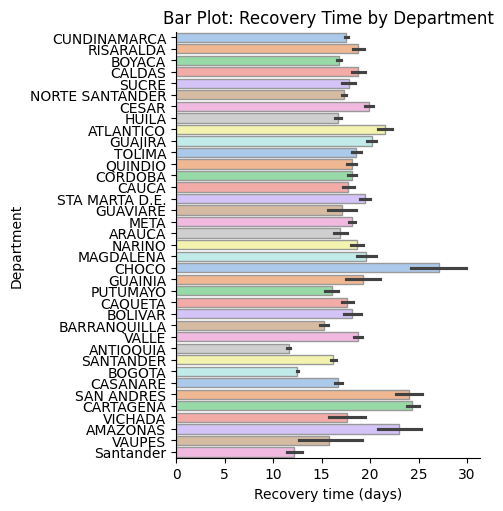

In [25]:
sns.catplot(data=df, y='Nombre departamento', x='Días de recuperación', kind='bar', palette='pastel', edgecolor='.6') \
  .set(xlabel='Recovery time (days)', ylabel='Department', title='Bar Plot: Recovery Time by Department');

### 3.3.2. Recovery Time in Major Cities

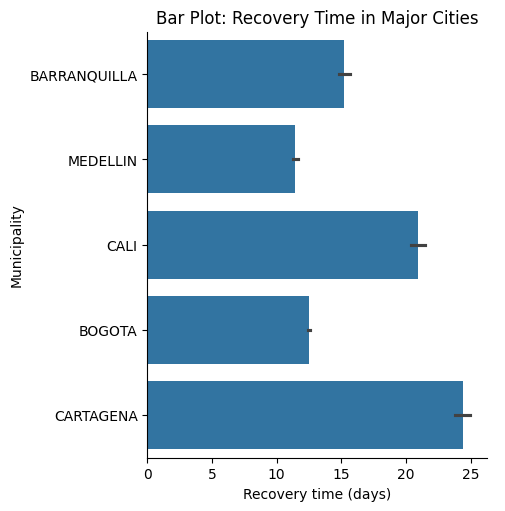

In [26]:
sns.catplot(data=df[(df['Nombre municipio'] == 'BOGOTA') | (df['Nombre municipio'] == 'BARRANQUILLA') |
                    (df['Nombre municipio'] == 'MEDELLIN') | (df['Nombre municipio'] == 'CALI') |
                    (df['Nombre municipio'] == 'CARTAGENA')],
             y='Nombre municipio', x='Días de recuperación', kind='bar') \
  .set(xlabel='Recovery time (days)', ylabel='Municipality', title='Bar Plot: Recovery Time in Major Cities');

### 3.3.3. Recovery Time According to Type of Contagion

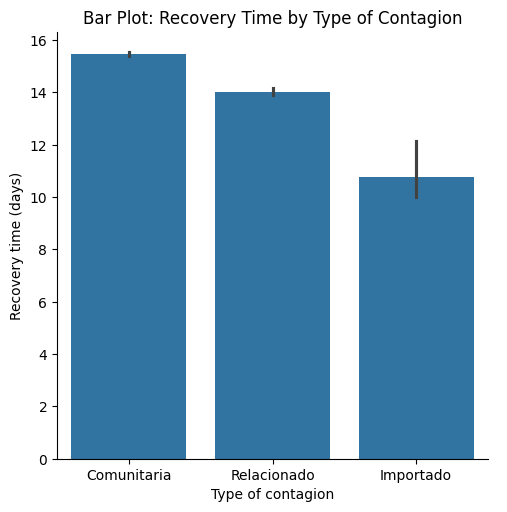

In [27]:
sns.catplot(data=df, x='Tipo de contagio', y='Días de recuperación', kind='bar') \
  .set(xlabel='Type of contagion', ylabel='Recovery time (days)', title='Bar Plot: Recovery Time by Type of Contagion');

### 3.3.4. Recovery Time by Case Treatment Location

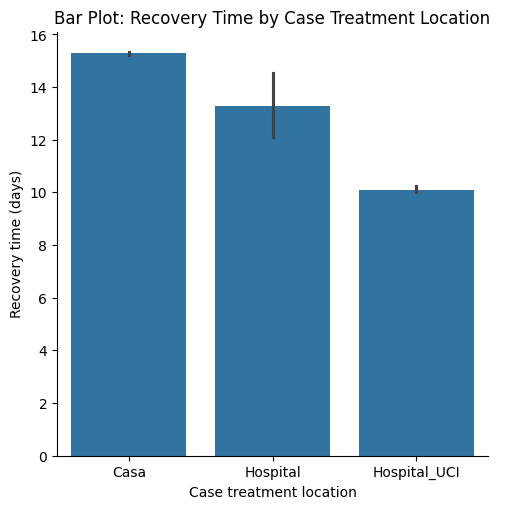

In [28]:
sns.catplot(data=df, x='Ubicación del caso', y='Días de recuperación', kind='bar') \
  .set(xlabel='Case treatment location', ylabel='Recovery time (days)', title='Bar Plot: Recovery Time by Case Treatment Location');

### 3.3.5. Recovery Time According to the Case Severity

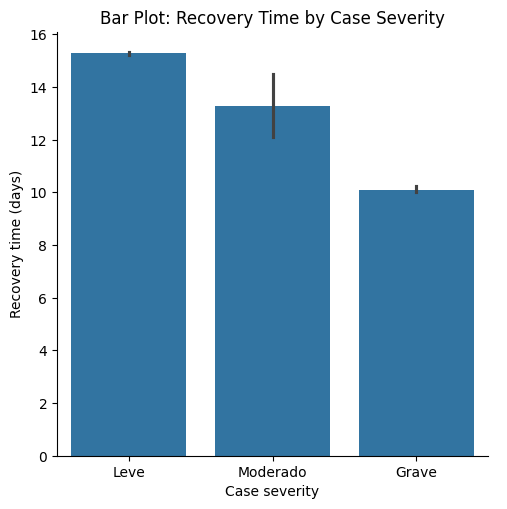

In [29]:
sns.catplot(data=df, x='Estado', y='Días de recuperación', kind='bar') \
  .set(xlabel='Case severity', ylabel='Recovery time (days)', title='Bar Plot: Recovery Time by Case Severity');

### 3.3.6. Recovery Time by Recovery Type

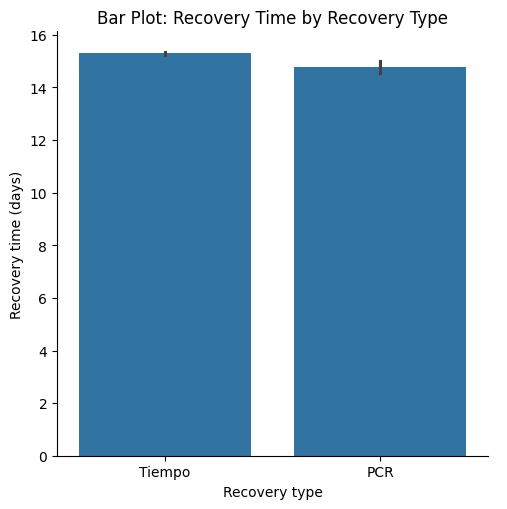

In [30]:
sns.catplot(data=df, x='Tipo de recuperación', y='Días de recuperación', kind='bar') \
  .set(xlabel='Recovery type', ylabel='Recovery time (days)', title='Bar Plot: Recovery Time by Recovery Type');

### 3.3.7. Recovery Time by Ethnicity

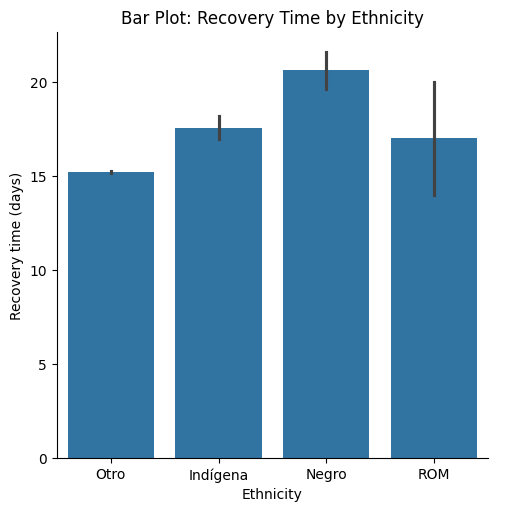

In [31]:
sns.catplot(data=df, x='Pertenencia étnica', y='Días de recuperación', kind='bar') \
  .set(xlabel='Ethnicity', ylabel='Recovery time (days)', title='Bar Plot: Recovery Time by Ethnicity');

# 4. Machine Learning Analysis

## 4.1. Set Up Variables and Find Correlations

In [32]:
# USE COLUMNS: Age, Sex, Type of contagion, Case treatment location, Case severity, Ethnicity, Recovery time

usecols = [2, 3, 4, 5, 6, 8, 9]
df = df.iloc[:, usecols]

In [33]:
# CREATE DUMMY VARIABLES FOR CATEGORICAL DATA

df_ml = pd.get_dummies(df, columns=categ_cols, prefix=['S', 'C', 'U', 'E', 'P']);

In [34]:
df_ml

,Edad,Días de recuperación,S_F,S_M,C_Comunitaria,C_Importado,C_Relacionado,U_Casa,U_Hospital,U_Hospital_UCI,E_Grave,E_Leve,E_Moderado,P_Indígena,P_Negro,P_Otro,P_ROM
0,15,24,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False
1,67,24,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False
2,32,24,True,False,False,False,True,True,False,False,False,True,False,False,False,True,False
3,11,24,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False
4,28,24,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95435,75,11,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False
95436,8,11,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False
95437,0,11,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False
95438,38,11,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False


[Text(0.5, 1.0, 'Heatmap of Correlations')]

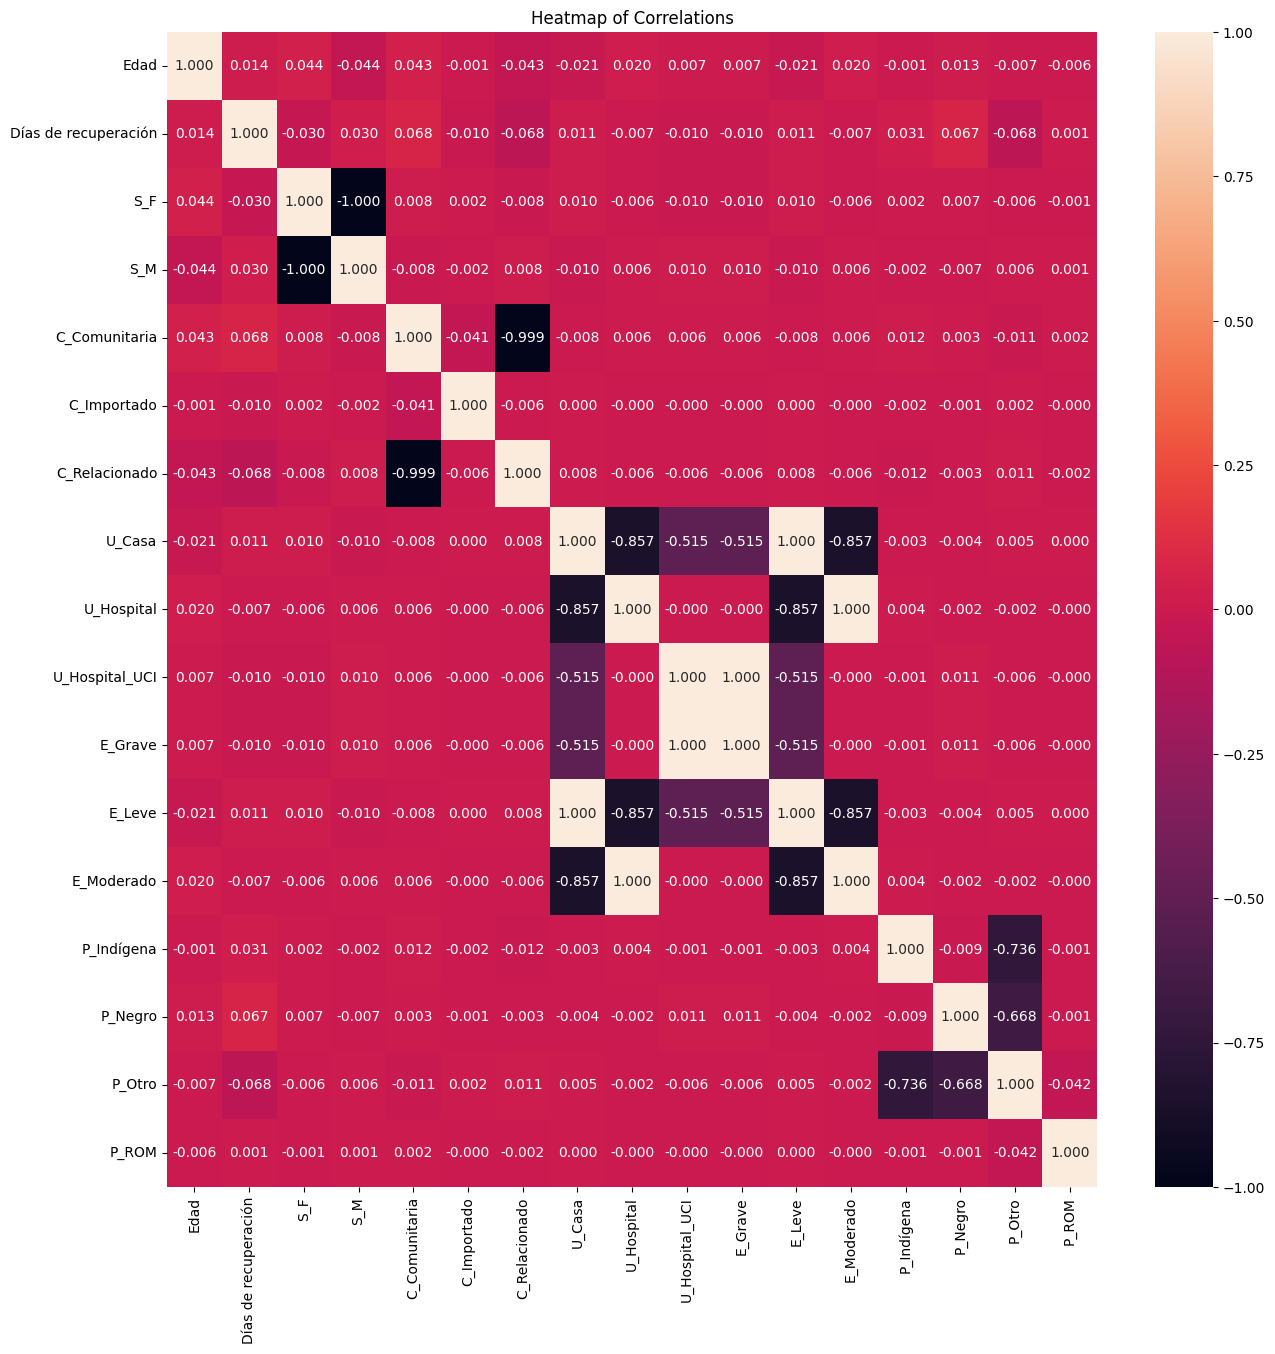

In [35]:
# CORRELATIONS THROUGH HEATMAP

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_ml.corr(), annot=True, ax=ax, fmt='.3f') \
  .set(title='Heatmap of Correlations')

In [36]:
# VARIABLE TO PREDICT (Recovery days) THROUGH ALL OTHER COLUMNS

output_col = 'Días de recuperación'
input_cols = df_ml.columns[df_ml.columns != output_col];

In [37]:
# CREATE TRAIN SET (30%) AND VALIDATION SET (70%)

x = df_ml[input_cols].values
y = df_ml[output_col].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3);

## 4.2. Linear Regression

In [38]:
lr = LinearRegression().fit(x_train, y_train)

In [39]:
y_predict = lr.predict(x_val)

### 4.2.1. Performance Metrics

In [40]:
print('R^2 (Coefficient of Determination):', lr.score(x_val, y_val))
print('MSE (Mean Squared Error):', mean_squared_error(y_val, y_predict))
print('RMSE (Root Mean Squared Error):', mean_squared_error(y_val, y_predict, squared=False))
print('MAE (Mean Absolute Error):', mean_absolute_error(y_val, y_predict))
print('MAPE (Mean Absolute Percentage Error):', mean_absolute_percentage_error(y_val, y_predict))

R^2 (Coefficient of Determination): 0.010596025258072905
MSE (Mean Squared Error): 51.759758430438886
RMSE (Root Mean Squared Error): 7.194425510799238
MAE (Mean Absolute Error): 5.459182930551733
MAPE (Mean Absolute Percentage Error): 0.37252061622077165


### 4.2.2. Prediction of Validation Set

In [41]:
print('Predicted Recovery time (days)')
print('Mean:', y_predict.mean())
print('Standard deviation:', y_predict.std())
print('Range:', y_predict.max() - y_predict.min())
print('Coefficient of variation', y_predict.std() / y_predict.mean())

Predicted Recovery time (days)
Mean: 15.277857601330558
Standard deviation: 0.7828012894189185
Range: 12.014864901646972
Coefficient of variation 0.05123763487301674


### 4.2.2. Original Recovery Time (Validation Set)

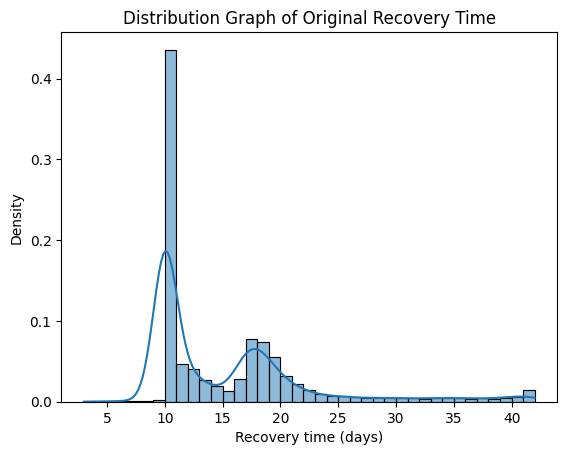

In [42]:
# sns.kdeplot(y_val) \
#   .set(xlabel='Recovery time (days)', ylabel='Frequency', title='Frequency Graph of Original Recovery Time');

# y_val_counts = pd.Series(y_val).value_counts()
# sns.lineplot(x=y_val_counts.index, y=y_val_counts.values) \
#   .set(xlabel='Recovery time (days)', ylabel='Frequency', title='Frequency Graph of Original Recovery Time');

sns.histplot(y_val, binwidth=1, kde=True, stat='probability') \
  .set(xlabel='Recovery time (days)', ylabel='Density', title='Distribution Graph of Original Recovery Time');

### 4.2.3. Predicted Recovery Time (Validation Set)

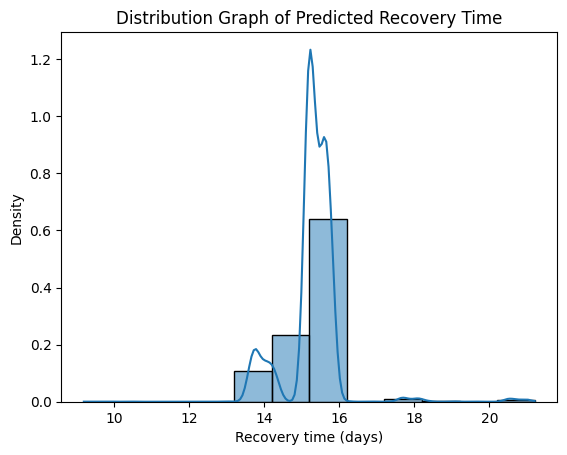

In [43]:
# sns.displot(y_predict) \
#   .set(xlabel='Recovery time (days)', ylabel='Frequency', title='Frequency Graph of Predicted Recovery Time');

# y_predict_counts = pd.Series(y_predict).value_counts()
# sns.lineplot(x=y_predict_counts.index, y=y_predict_counts.values) \
#   .set(xlabel='Recovery time (days)', ylabel='Frequency', title='Frequency Graph of Predicted Recovery Time');

sns.histplot(y_predict, binwidth=1, kde=True, stat='probability') \
  .set(xlabel='Recovery time (days)', ylabel='Density', title='Distribution Graph of Predicted Recovery Time');

### 4.2.4. Residuals

In [44]:
residuals = y_val - y_predict

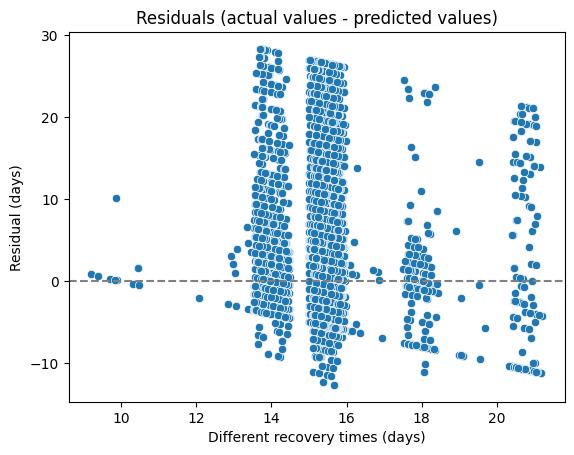

In [45]:
sns.scatterplot(x=y_predict, y=residuals) \
  .set(xlabel='Different recovery times (days)', ylabel='Residual (days)', title='Residuals (actual values - predicted values)');
plt.axhline(y=0, color='gray', linestyle='--')

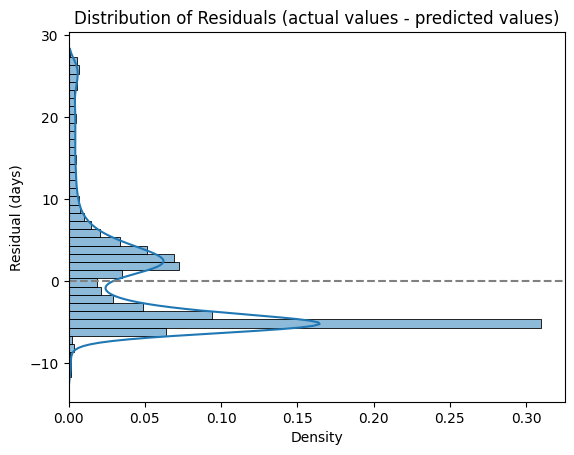

In [46]:
# sns.kdeplot(residuals) \
#    .set(xlabel='Recovery time (days)', ylabel='Frequency', title='Residuals (actual values - predicted values)');

# y_residuals_counts = pd.Series(residuals).value_counts()
# sns.lineplot(x=y_residuals_counts.index, y=y_residuals_counts.values) \
#    .set(xlabel='Recovery time (days)', ylabel='Frequency', title='Residuals (actual values - predicted values)');

sns.histplot(y=residuals, binwidth=1, kde=True, stat='probability') \
  .set(xlabel='Density', ylabel='Residual (days)', title='Distribution of Residuals (actual values - predicted values)');
plt.axhline(y=0, color='gray', linestyle='--')

### 4.2.2. Linear Regression Equation

In [47]:
print('Coefficients', lr.coef_)

Coefficients [ 0.00537454 -0.21630805  0.21630805  2.27068404 -3.07889812  0.80821407
  1.40841596  0.21031795 -1.61873391 -1.61873391  1.40841596  0.21031795
 -0.58714464  2.22058958 -3.08162864  1.44818369]


In [48]:
coefficients = lr.coef_
intercept = lr.intercept_

equation = f'y = {intercept:.3f} '

for coef, col in zip(coefficients, input_cols):
    equation += f'+ ({coef:.3f}) * {col} '

print('Linear Regression Equation:')
print(equation)

Linear Regression Equation:
y = 13.216 + (0.005) * Edad + (-0.216) * S_F + (0.216) * S_M + (2.271) * C_Comunitaria + (-3.079) * C_Importado + (0.808) * C_Relacionado + (1.408) * U_Casa + (0.210) * U_Hospital + (-1.619) * U_Hospital_UCI + (-1.619) * E_Grave + (1.408) * E_Leve + (0.210) * E_Moderado + (-0.587) * P_Indígena + (2.221) * P_Negro + (-3.082) * P_Otro + (1.448) * P_ROM 
